<a href="https://colab.research.google.com/github/ochiait/aiit_machine_learning/blob/master/181112_%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E7%89%B9%E8%AB%96%E6%BC%94%E7%BF%92_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

181112_機械学習特論演習_CNN_Keras

演習１：CIFAR-10の画像をCNNで分類してみよう

In [0]:
#ライブラリのインポート
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras import datasets
from keras import utils

In [0]:
#データの取り込みと確認
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_test.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000, 1)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000, 1)


In [0]:
#データの整形
#1以下の値に正規化
x_train=x_train/255.
x_test=x_test/255.
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)

In [0]:
#畳み込み層を2層追加
model = models.Sequential()
model.add(
  layers.Conv2D(
    filters=32,
    input_shape=(32,32,3),
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',#入力画像と出力画像のサイズを同じにするPadding
    activation='relu'
  )
)

model.add(
  layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',
    activation='relu'
  )
)


In [0]:
#プーリング層を追加
model.add(layers.MaxPooling2D(pool_size=(2,2)))#画像サイズは1/4になる

In [0]:
#ドロップアウト層を追加
#ドロップアウト率は0.25
model.add(layers.Dropout(0.25))

In [0]:
#フィルタの数を2倍にしてもう一回繰り返す。
model.add(
  layers.Conv2D(
    filters=64,
    input_shape=(32,32,3),
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',
    activation='relu'
  )
)

model.add(
  layers.Conv2D(
    filters=64,
    kernel_size=(3,3),
    strides=(1,1),
    padding='same',
    activation='relu'
  )
)

model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

In [0]:
#全結合3層でクラス分類
#ベクトル化（次数は4096）
model.add(layers.Flatten())
#次数を512に落とす
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
#最後はsoftmaxで１０のクラス分類
model.add(layers.Dense(units=10, activation='softmax'))

In [0]:
#モデルのコンパイル
model.compile(
loss='categorical_crossentropy',#多クラス分類の損失関数
optimizer=optimizers.Adam(lr=0.001),#SGDよりも洗練化されているRMSprop, AdaDelta, Adagradなどいろいろあるので試してみてください
metrics=['acc']#精度で評価
)

In [0]:
#モデルのネットワーク構造の表示
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [0]:
#学習(learning)
#エポック数20, バッチサイズ32で学習
history=model.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)#トレーニングデータの20％を検証用に使う

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 30s 753us/step - loss: 1.1446 - acc: 0.6264 - val_loss: 0.9570 - val_acc: 0.6874
Epoch 2/20
40000/40000 [==============================] - 32s 790us/step - loss: 1.0675 - acc: 0.6531 - val_loss: 0.9214 - val_acc: 0.6988
Epoch 3/20
40000/40000 [==============================] - 32s 793us/step - loss: 0.9979 - acc: 0.6736 - val_loss: 0.8559 - val_acc: 0.7135
Epoch 4/20
40000/40000 [==============================] - 29s 735us/step - loss: 0.9541 - acc: 0.6883 - val_loss: 0.8291 - val_acc: 0.7356
Epoch 5/20
40000/40000 [==============================] - 29s 727us/step - loss: 0.9120 - acc: 0.7044 - val_loss: 0.8295 - val_acc: 0.7276
Epoch 6/20
40000/40000 [==============================] - 28s 697us/step - loss: 0.9003 - acc: 0.7083 - val_loss: 0.8955 - val_acc: 0.7323
Epoch 7/20
40000/40000 [==============================] - 29s 715us/step - loss: 0.8640 - acc: 0.7144 - val_loss: 0.

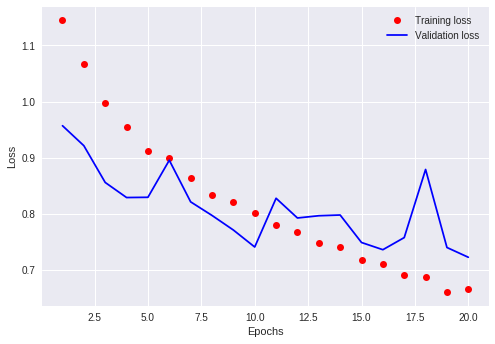

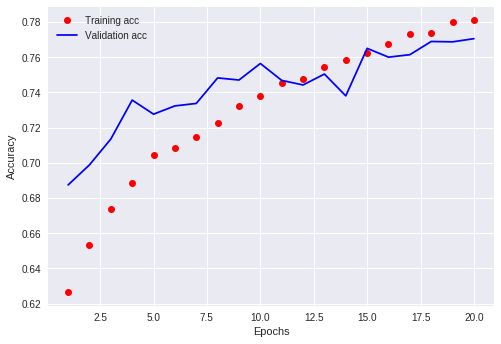

In [0]:
#学習過程（learning process）のグラフ表示（graph expression）
#トレーニング時、検証時の損失と精度をグラフ化
history_dict=history.history
loss=history_dict['loss']
val_loss=history_dict['val_loss']
acc=history_dict['acc']
val_acc=history_dict['val_acc']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.plot(epochs,acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', 
label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
#最後に別のテスト用データで試験
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 2s 210us/step
[0.7262585110664368, 0.7677]
